# Week 5: Data Visualization Fundamentals
## Part 2: Creating Basic Plots

**Date:** Wednesday, May 7, 2025  
**Duration:** 25 minutes  
**Course:** Python for Data Analysis

---

### Learning Objectives
By the end of this section, you will be able to:
1. Create line plots for time series and trend analysis
2. Build scatter plots to visualize relationships between variables
3. Generate bar charts for categorical data comparison
4. Construct histograms to analyze data distributions
5. Choose the appropriate plot type for different data scenarios
6. Apply these techniques to real e-commerce data analysis

In [1]:
# Essential imports for this session
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for better display
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Create sample Olist-like data for demonstrations
np.random.seed(42)

print("✅ Setup complete! Ready to create amazing visualizations.")
print("📊 We'll be working with simulated Olist e-commerce data throughout this session.")

✅ Setup complete! Ready to create amazing visualizations.
📊 We'll be working with simulated Olist e-commerce data throughout this session.


## Sample Data Preparation

Let's create realistic e-commerce data similar to what you'll find in the Olist dataset. This will help us understand how to visualize real business scenarios.

In [2]:
# Create comprehensive sample e-commerce data
print("🏗️ Creating sample e-commerce data...")

# Time series data - Daily orders over 1 year
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
date_range = pd.date_range(start_date, end_date, freq='D')

# Simulate realistic order patterns with seasonality
days = len(date_range)
base_orders = 45
seasonal_trend = 15 * np.sin(2 * np.pi * np.arange(days) / 365)  # Annual seasonality
weekly_pattern = 5 * np.sin(2 * np.pi * np.arange(days) / 7)     # Weekly pattern
noise = np.random.normal(0, 8, days)                              # Random variation
daily_orders = base_orders + seasonal_trend + weekly_pattern + noise
daily_orders = np.maximum(daily_orders, 10)  # Ensure positive values

# Create time series DataFrame
time_series_data = pd.DataFrame({
    'date': date_range,
    'daily_orders': daily_orders.astype(int)
})

# Product categories and sales data
categories = ['Electronics', 'Clothing', 'Home & Garden', 'Sports', 'Books', 
              'Beauty', 'Automotive', 'Toys', 'Health', 'Food']
category_sales = np.random.randint(500, 3000, len(categories))

category_data = pd.DataFrame({
    'category': categories,
    'total_sales': category_sales
})

# Customer satisfaction vs order value data
n_orders = 1000
order_values = np.random.lognormal(mean=3.5, sigma=0.8, size=n_orders)
# Simulate relationship: higher order value tends to have slightly higher satisfaction
base_satisfaction = 3.5
value_effect = 0.3 * (order_values - np.mean(order_values)) / np.std(order_values)
review_scores = base_satisfaction + value_effect + np.random.normal(0, 0.8, n_orders)
review_scores = np.clip(review_scores, 1, 5)  # Keep scores between 1-5

satisfaction_data = pd.DataFrame({
    'order_value': order_values,
    'review_score': review_scores
})

# Delivery times distribution
delivery_times = np.random.gamma(shape=2, scale=3, size=2000)  # Right-skewed distribution
delivery_times = np.clip(delivery_times, 1, 30)  # 1-30 days

print(f"✅ Created datasets:")
print(f"   📈 Time series: {len(time_series_data)} days of order data")
print(f"   📊 Categories: {len(category_data)} product categories")
print(f"   💰 Satisfaction: {len(satisfaction_data)} order-review pairs")
print(f"   🚚 Delivery: {len(delivery_times)} delivery time records")
print("\n🎯 Ready to explore the four fundamental plot types!")

🏗️ Creating sample e-commerce data...
✅ Created datasets:
   📈 Time series: 365 days of order data
   📊 Categories: 10 product categories
   💰 Satisfaction: 1000 order-review pairs
   🚚 Delivery: 2000 delivery time records

🎯 Ready to explore the four fundamental plot types!


## 1. Line Plots (8 minutes)

### When to Use Line Plots:
- **Time series data** (trends over time)
- **Continuous data** with natural ordering
- **Comparing trends** between multiple groups
- **Showing relationships** where x-axis has meaningful sequence

### Business Applications:
- Daily/monthly sales trends
- Website traffic over time
- Stock prices
- Customer acquisition rates

### SQL to Python Analogy:
```sql
-- In SQL, you might aggregate by date:
SELECT DATE(order_date), COUNT(*) as daily_orders
FROM orders 
GROUP BY DATE(order_date)
ORDER BY DATE(order_date);
```

```python
# In Python, you visualize that aggregation:
ax.plot(dates, daily_orders)
```

📈 Creating Basic Line Plot


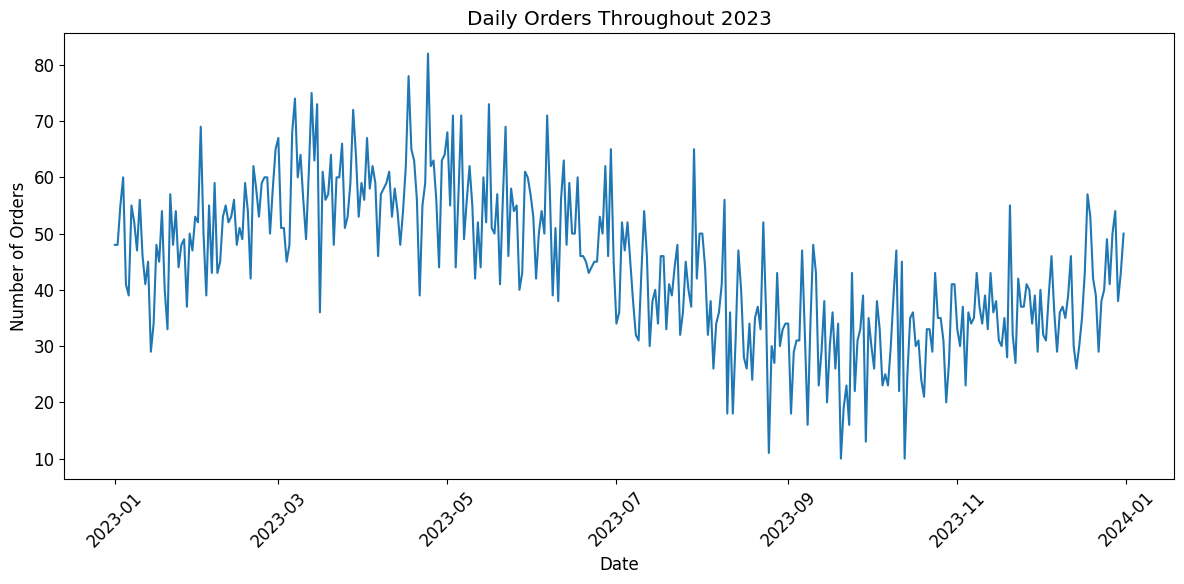

🔍 What patterns do you notice in this time series?
   • Seasonal trends?
   • Weekly patterns?
   • Any outliers or anomalies?


In [6]:
# 1.1 Basic Line Plot - Daily Orders Trend
print("📈 Creating Basic Line Plot")

# Create figure and axes (using OO interface)
fig, ax = plt.subplots(figsize=(12, 6))

# Basic line plot
ax.plot(time_series_data['date'], time_series_data['daily_orders'])

# Basic customization
ax.set_title('Daily Orders Throughout 2023')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Orders')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("🔍 What patterns do you notice in this time series?")
print("   • Seasonal trends?")
print("   • Weekly patterns?")
print("   • Any outliers or anomalies?")

📈 Creating Enhanced Line Plot with Multiple Trends


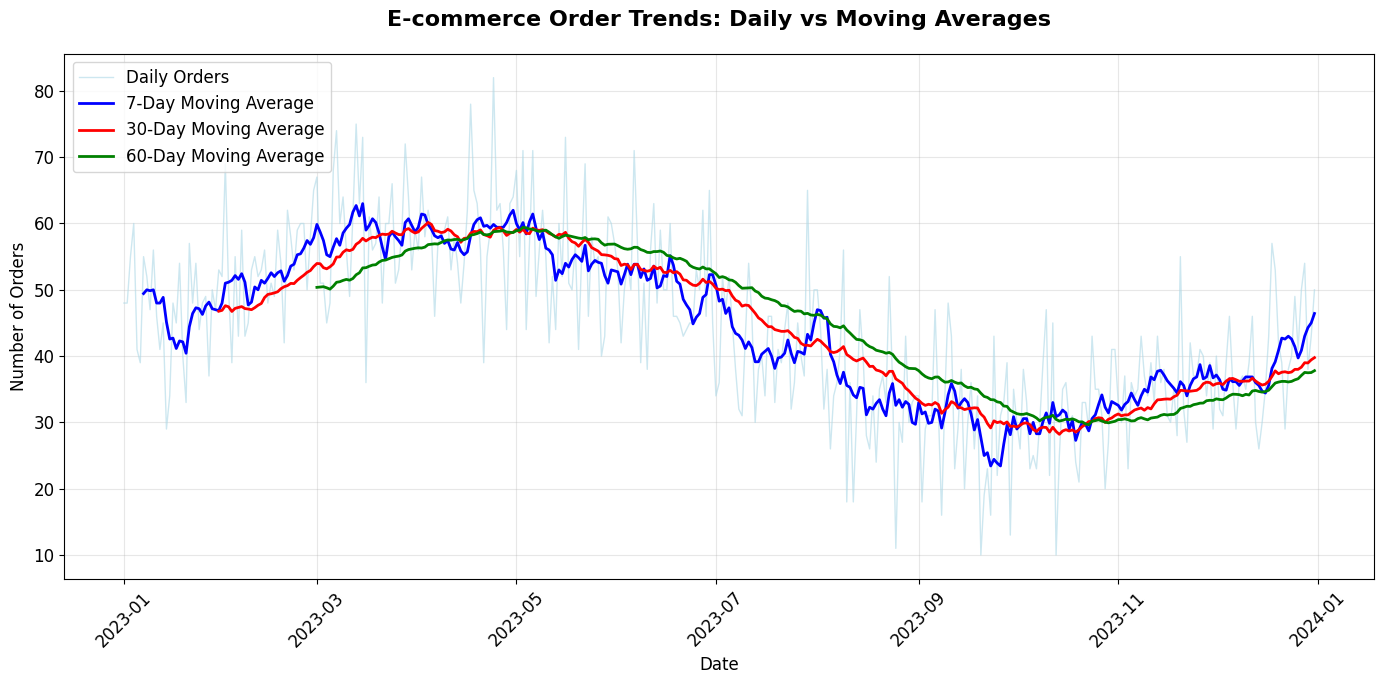

💡 Business Insights:
   • Moving averages smooth out daily fluctuations
   • Helps identify long-term trends vs short-term noise
   • Critical for business planning and forecasting


In [8]:
# 1.2 Enhanced Line Plot with Multiple Lines
print("📈 Creating Enhanced Line Plot with Multiple Trends")

# Calculate moving averages for trend analysis
time_series_data['7_day_avg'] = time_series_data['daily_orders'].rolling(window=7).mean()
time_series_data['30_day_avg'] = time_series_data['daily_orders'].rolling(window=30).mean()
time_series_data['60_day_avg'] = time_series_data['daily_orders'].rolling(window=60).mean()


# Create enhanced visualization
fig, ax = plt.subplots(figsize=(14, 7))

# Plot multiple lines
ax.plot(time_series_data['date'], time_series_data['daily_orders'], 
        color='lightblue', alpha=0.6, linewidth=1, label='Daily Orders')
ax.plot(time_series_data['date'], time_series_data['7_day_avg'], 
        color='blue', linewidth=2, label='7-Day Moving Average')
ax.plot(time_series_data['date'], time_series_data['30_day_avg'], 
        color='red', linewidth=2, label='30-Day Moving Average')
ax.plot(time_series_data['date'], time_series_data['60_day_avg'], 
        color='green', linewidth=2, label='60-Day Moving Average')

# Professional styling
ax.set_title('E-commerce Order Trends: Daily vs Moving Averages', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Orders', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("💡 Business Insights:")
print("   • Moving averages smooth out daily fluctuations")
print("   • Helps identify long-term trends vs short-term noise")
print("   • Critical for business planning and forecasting")

💰 Business Example: Monthly Revenue Trends


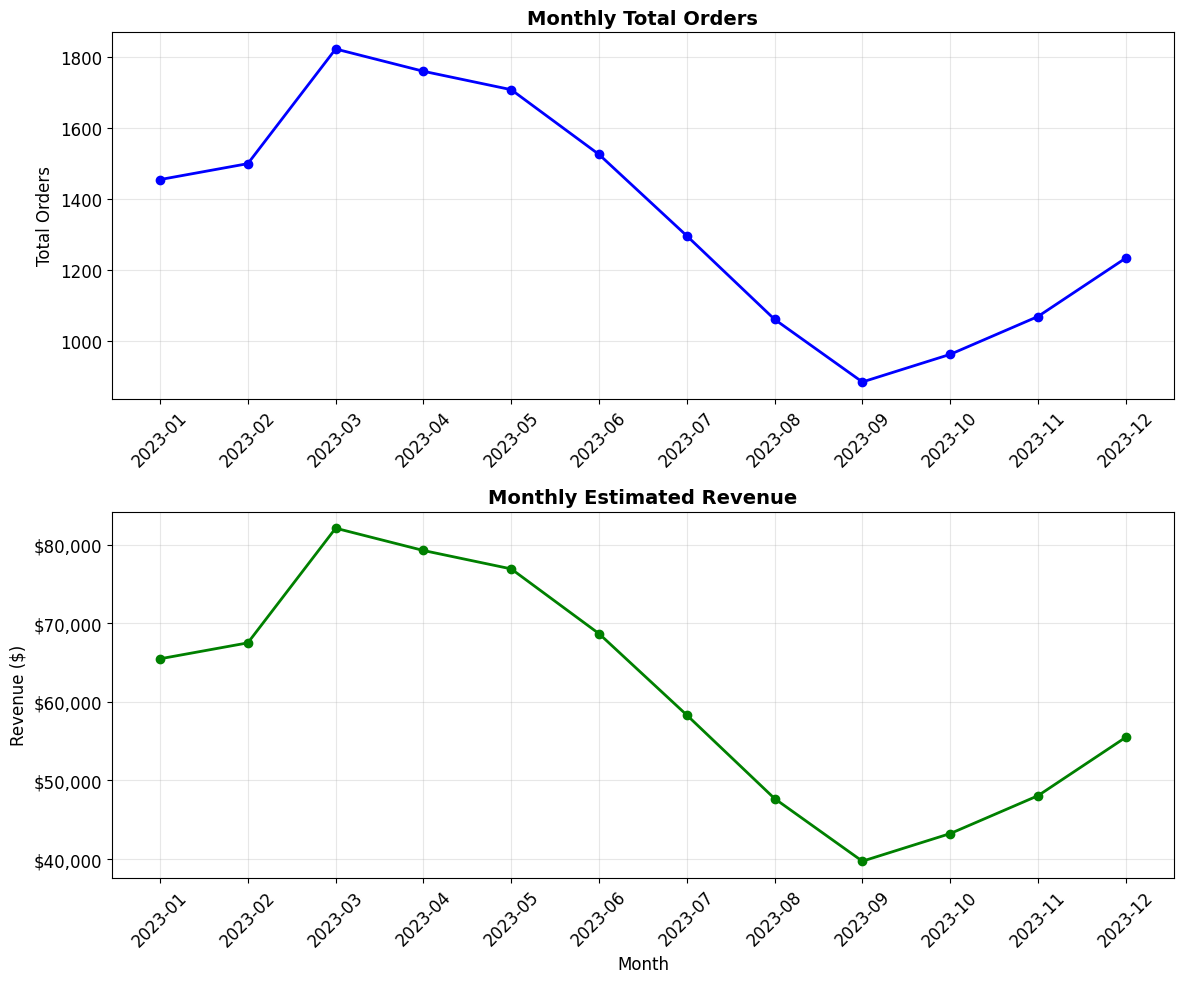

📊 Monthly Performance Summary:
   • Peak month orders: 1,824
   • Lowest month orders: 883
   • Average monthly revenue: $61,035
   • Revenue range: $39,735 - $82,080


In [9]:
# 1.3 Business Application: Monthly Revenue Comparison
print("💰 Business Example: Monthly Revenue Trends")

# Create monthly aggregated data
monthly_data = time_series_data.copy()
monthly_data['month'] = monthly_data['date'].dt.to_period('M')
monthly_summary = monthly_data.groupby('month').agg({
    'daily_orders': ['sum', 'mean']
}).round(1)

monthly_summary.columns = ['total_orders', 'avg_daily_orders']
monthly_summary['estimated_revenue'] = monthly_summary['total_orders'] * 45  # Assume $45 avg order value

# Create comparison visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Monthly orders
months = [str(m) for m in monthly_summary.index]
ax1.plot(months, monthly_summary['total_orders'], 'bo-', linewidth=2, markersize=6)
ax1.set_title('Monthly Total Orders', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Orders')
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Estimated revenue
ax2.plot(months, monthly_summary['estimated_revenue'], 'go-', linewidth=2, markersize=6)
ax2.set_title('Monthly Estimated Revenue', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Revenue ($)')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# Format y-axis for revenue
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Display summary statistics
print("📊 Monthly Performance Summary:")
print(f"   • Peak month orders: {monthly_summary['total_orders'].max():,.0f}")
print(f"   • Lowest month orders: {monthly_summary['total_orders'].min():,.0f}")
print(f"   • Average monthly revenue: ${monthly_summary['estimated_revenue'].mean():,.0f}")
print(f"   • Revenue range: ${monthly_summary['estimated_revenue'].min():,.0f} - ${monthly_summary['estimated_revenue'].max():,.0f}")

## 2. Scatter Plots (5 minutes)

### When to Use Scatter Plots:
- **Exploring relationships** between two continuous variables
- **Identifying correlations** (positive, negative, or none)
- **Detecting outliers** in bivariate data
- **Comparing groups** with different colors/markers

### Business Applications:
- Price vs customer satisfaction
- Marketing spend vs sales
- Customer age vs purchase amount
- Website traffic vs conversion rate

### Key Questions Scatter Plots Answer:
- Is there a relationship between these variables?
- How strong is the correlation?
- Are there any unusual data points?
- Do different groups show different patterns?

💫 Creating Basic Scatter Plot


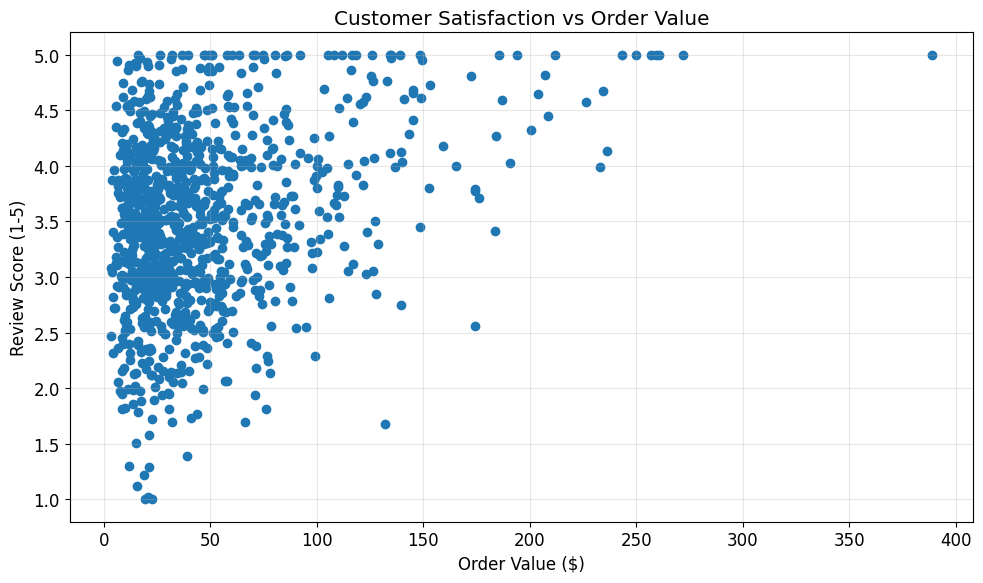

🔍 Analysis Questions:
   • Do you see any relationship between order value and satisfaction?
   • Are there any outliers (unusual combinations)?
   • What's the typical range of order values?


In [10]:
# 2.1 Basic Scatter Plot - Order Value vs Review Score
print("💫 Creating Basic Scatter Plot")

fig, ax = plt.subplots(figsize=(10, 6))

# Basic scatter plot
ax.scatter(satisfaction_data['order_value'], satisfaction_data['review_score'])

ax.set_title('Customer Satisfaction vs Order Value')
ax.set_xlabel('Order Value ($)')
ax.set_ylabel('Review Score (1-5)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 Analysis Questions:")
print("   • Do you see any relationship between order value and satisfaction?")
print("   • Are there any outliers (unusual combinations)?")
print("   • What's the typical range of order values?")

✨ Creating Enhanced Scatter Plot with Business Insights


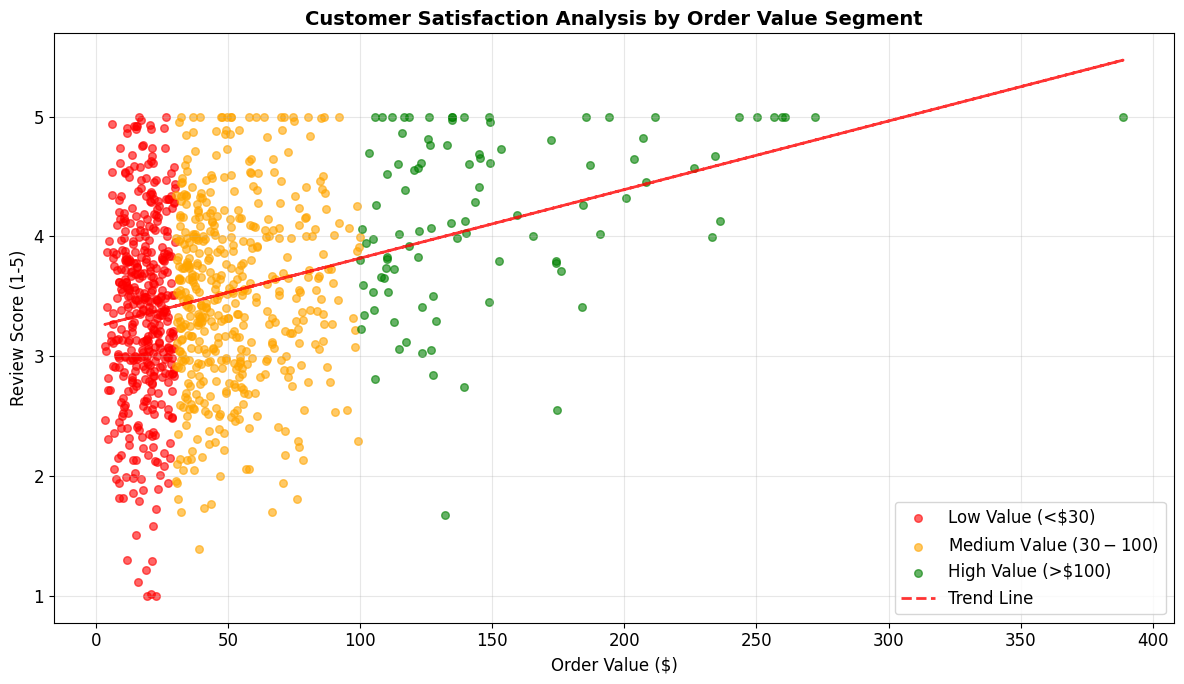

📈 Statistical Insights:
   • Correlation coefficient: 0.307
   • Relationship strength: Moderate
   • Business insight: Higher order values tend to have better reviews


In [11]:
# 2.2 Enhanced Scatter Plot with Insights
print("✨ Creating Enhanced Scatter Plot with Business Insights")

fig, ax = plt.subplots(figsize=(12, 7))

# Create color-coded scatter plot based on order value ranges
low_value = satisfaction_data['order_value'] < 30
medium_value = (satisfaction_data['order_value'] >= 30) & (satisfaction_data['order_value'] < 100)
high_value = satisfaction_data['order_value'] >= 100

# Plot different value segments with different colors
ax.scatter(satisfaction_data[low_value]['order_value'], 
          satisfaction_data[low_value]['review_score'],
          c='red', alpha=0.6, s=30, label='Low Value (<$30)')

ax.scatter(satisfaction_data[medium_value]['order_value'], 
          satisfaction_data[medium_value]['review_score'],
          c='orange', alpha=0.6, s=30, label='Medium Value ($30-$100)')

ax.scatter(satisfaction_data[high_value]['order_value'], 
          satisfaction_data[high_value]['review_score'],
          c='green', alpha=0.6, s=30, label='High Value (>$100)')

# Add trend line
z = np.polyfit(satisfaction_data['order_value'], satisfaction_data['review_score'], 1)
p = np.poly1d(z)
ax.plot(satisfaction_data['order_value'], p(satisfaction_data['order_value']), 
        "r--", alpha=0.8, linewidth=2, label='Trend Line')

# Professional styling
ax.set_title('Customer Satisfaction Analysis by Order Value Segment', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Order Value ($)', fontsize=12)
ax.set_ylabel('Review Score (1-5)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = satisfaction_data['order_value'].corr(satisfaction_data['review_score'])
print(f"📈 Statistical Insights:")
print(f"   • Correlation coefficient: {correlation:.3f}")
print(f"   • Relationship strength: {'Strong' if abs(correlation) > 0.7 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'}")
print(f"   • Business insight: {'Higher order values tend to have better reviews' if correlation > 0.1 else 'No clear relationship between order value and satisfaction'}")

## 3. Bar Charts (7 minutes)

### When to Use Bar Charts:
- **Categorical data comparison** (most common use)
- **Showing rankings** or hierarchies
- **Comparing quantities** across different groups
- **Before/after comparisons**

### Types of Bar Charts:
- **Vertical bars** (`plt.bar()`) - standard for most cases
- **Horizontal bars** (`plt.barh()`) - better for long category names
- **Grouped bars** - comparing multiple metrics
- **Stacked bars** - showing composition

### Business Applications:
- Sales by product category
- Performance by region
- Survey responses
- Market share analysis

📊 Creating Basic Bar Chart


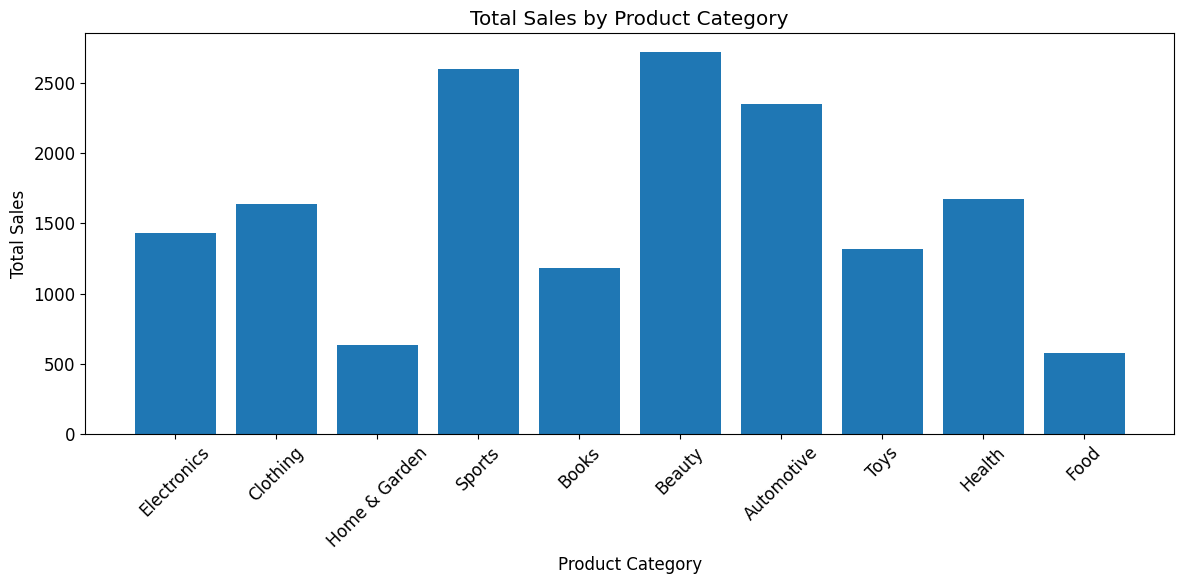

🔍 Quick Analysis:
   • Top category: Beauty
   • Lowest category: Food


In [12]:
# 3.1 Basic Vertical Bar Chart - Sales by Category
print("📊 Creating Basic Bar Chart")

fig, ax = plt.subplots(figsize=(12, 6))

# Basic bar chart
ax.bar(category_data['category'], category_data['total_sales'])

ax.set_title('Total Sales by Product Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("🔍 Quick Analysis:")
print(f"   • Top category: {category_data.loc[category_data['total_sales'].idxmax(), 'category']}")
print(f"   • Lowest category: {category_data.loc[category_data['total_sales'].idxmin(), 'category']}")

📊 Creating Horizontal Bar Chart (Better for Long Labels)


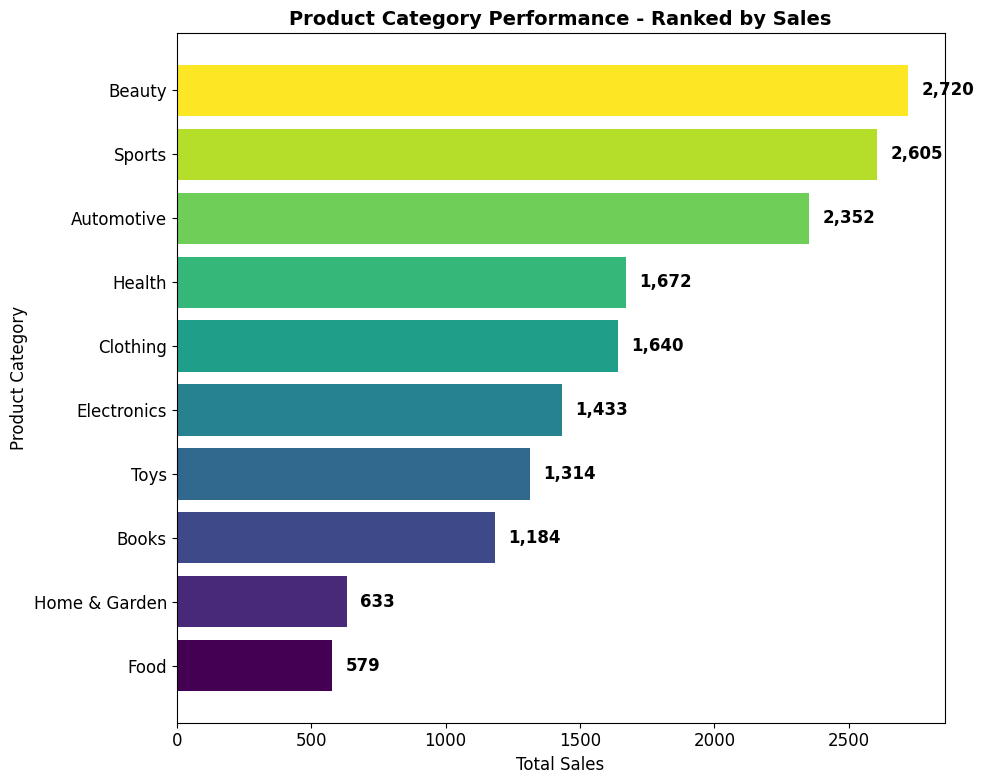

💡 Why horizontal bars work better here:
   • Category names are fully readable
   • Natural ranking from bottom to top
   • Value labels fit better on the right


In [13]:
# 3.2 Horizontal Bar Chart - Better for Long Category Names
print("📊 Creating Horizontal Bar Chart (Better for Long Labels)")

# Sort data for better visualization
category_sorted = category_data.sort_values('total_sales', ascending=True)

fig, ax = plt.subplots(figsize=(10, 8))

# Horizontal bar chart with color gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(category_sorted)))
bars = ax.barh(category_sorted['category'], category_sorted['total_sales'], color=colors)

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width + 50, bar.get_y() + bar.get_height()/2, 
            f'{width:,.0f}', ha='left', va='center', fontweight='bold')

ax.set_title('Product Category Performance - Ranked by Sales', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Total Sales', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)

plt.tight_layout()
plt.show()

print("💡 Why horizontal bars work better here:")
print("   • Category names are fully readable")
print("   • Natural ranking from bottom to top")
print("   • Value labels fit better on the right")

📊 Creating Grouped Bar Chart for Multi-Metric Comparison


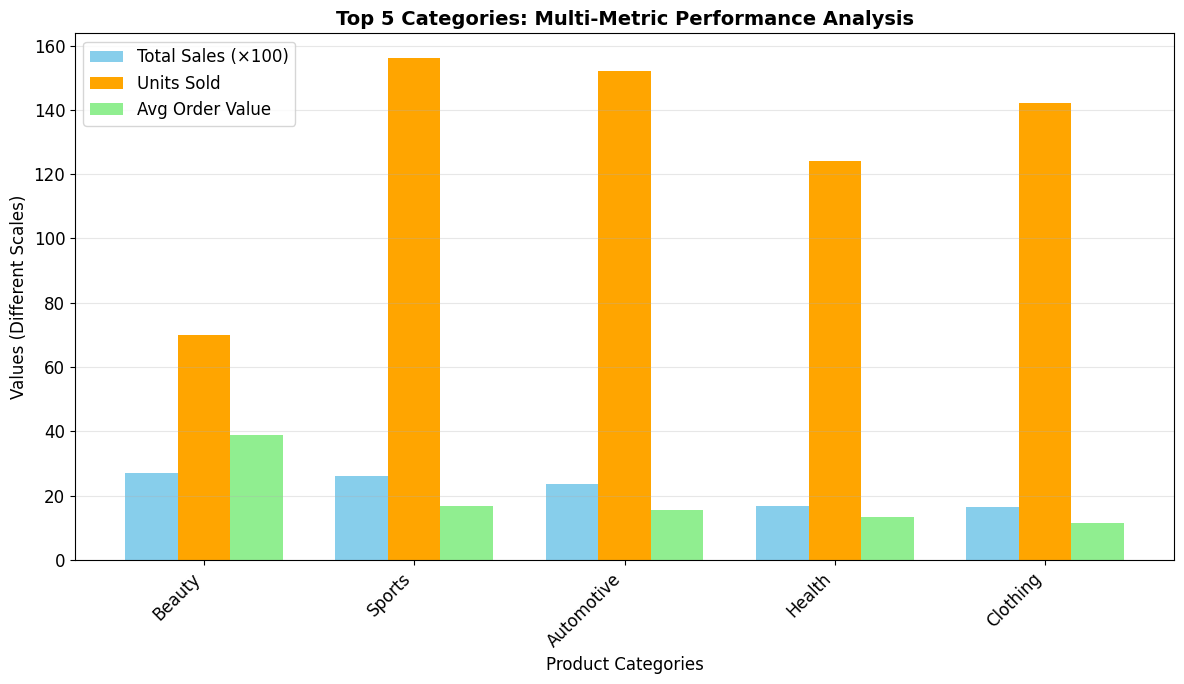

📈 Business Insights from Grouped Comparison:
   • Compare multiple KPIs side by side
   • Identify categories with high volume vs high value
   • Spot opportunities for optimization

⚠️ Note: Different scales combined - use with caution in real analysis!


In [14]:
# 3.3 Grouped Bar Chart - Comparing Multiple Metrics
print("📊 Creating Grouped Bar Chart for Multi-Metric Comparison")

# Create additional metrics for demonstration
np.random.seed(42)
category_data['units_sold'] = np.random.randint(50, 200, len(category_data))
category_data['avg_order_value'] = category_data['total_sales'] / category_data['units_sold']

# Select top 5 categories for cleaner visualization
top_categories = category_data.nlargest(5, 'total_sales')

fig, ax = plt.subplots(figsize=(12, 7))

# Set up grouped bars
x = np.arange(len(top_categories))
width = 0.25

# Create three sets of bars
bars1 = ax.bar(x - width, top_categories['total_sales']/100, width, 
               label='Total Sales (×100)', color='skyblue')
bars2 = ax.bar(x, top_categories['units_sold'], width, 
               label='Units Sold', color='orange')
bars3 = ax.bar(x + width, top_categories['avg_order_value'], width, 
               label='Avg Order Value', color='lightgreen')

# Customize the chart
ax.set_title('Top 5 Categories: Multi-Metric Performance Analysis', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Product Categories', fontsize=12)
ax.set_ylabel('Values (Different Scales)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(top_categories['category'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("📈 Business Insights from Grouped Comparison:")
print("   • Compare multiple KPIs side by side")
print("   • Identify categories with high volume vs high value")
print("   • Spot opportunities for optimization")
print("\n⚠️ Note: Different scales combined - use with caution in real analysis!")

## 4. Histograms (5 minutes)

### When to Use Histograms:
- **Understanding data distribution** (shape, spread, central tendency)
- **Identifying outliers** and unusual patterns
- **Checking for normality** in your data
- **Quality control** and process monitoring

### Key Concepts:
- **Bins**: Intervals that group continuous data
- **Frequency**: Count of observations in each bin
- **Distribution shape**: Normal, skewed, bimodal, etc.

### Business Applications:
- Customer age distribution
- Order value patterns
- Delivery time analysis
- Website session duration

### Histogram vs Bar Chart:
- **Histogram**: Continuous data, adjacent bars, shows distribution
- **Bar Chart**: Categorical data, separate bars, shows comparison

📊 Creating Basic Histogram


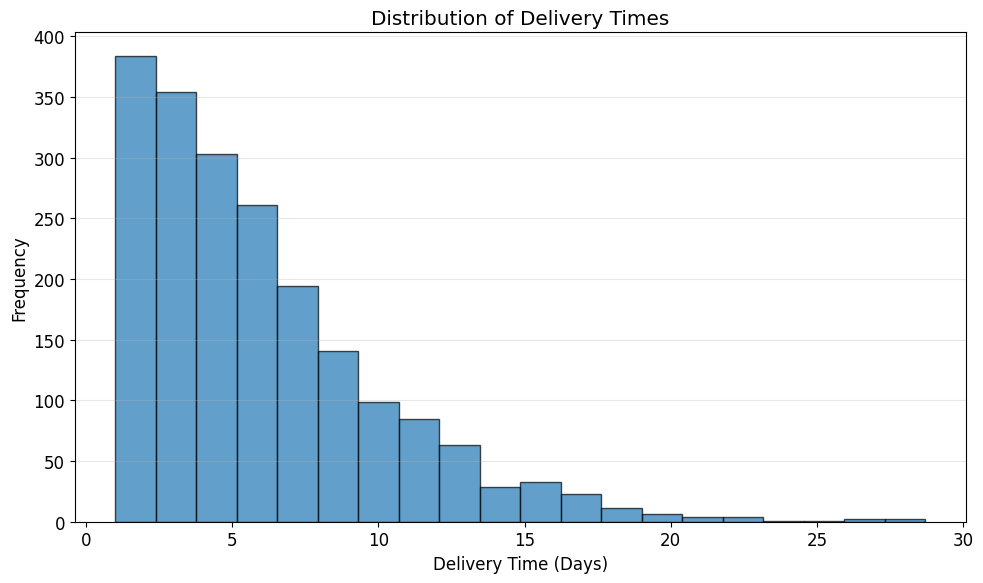

🔍 Distribution Analysis:
   • Mean delivery time: 5.9 days
   • Median delivery time: 5.0 days
   • 95% of orders delivered within: 14.0 days


In [15]:
# 4.1 Basic Histogram - Delivery Time Distribution
print("📊 Creating Basic Histogram")

fig, ax = plt.subplots(figsize=(10, 6))

# Basic histogram
ax.hist(delivery_times, bins=20, edgecolor='black', alpha=0.7)

ax.set_title('Distribution of Delivery Times')
ax.set_xlabel('Delivery Time (Days)')
ax.set_ylabel('Frequency')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("🔍 Distribution Analysis:")
print(f"   • Mean delivery time: {np.mean(delivery_times):.1f} days")
print(f"   • Median delivery time: {np.median(delivery_times):.1f} days")
print(f"   • 95% of orders delivered within: {np.percentile(delivery_times, 95):.1f} days")

📈 Creating Enhanced Histogram with Business Context


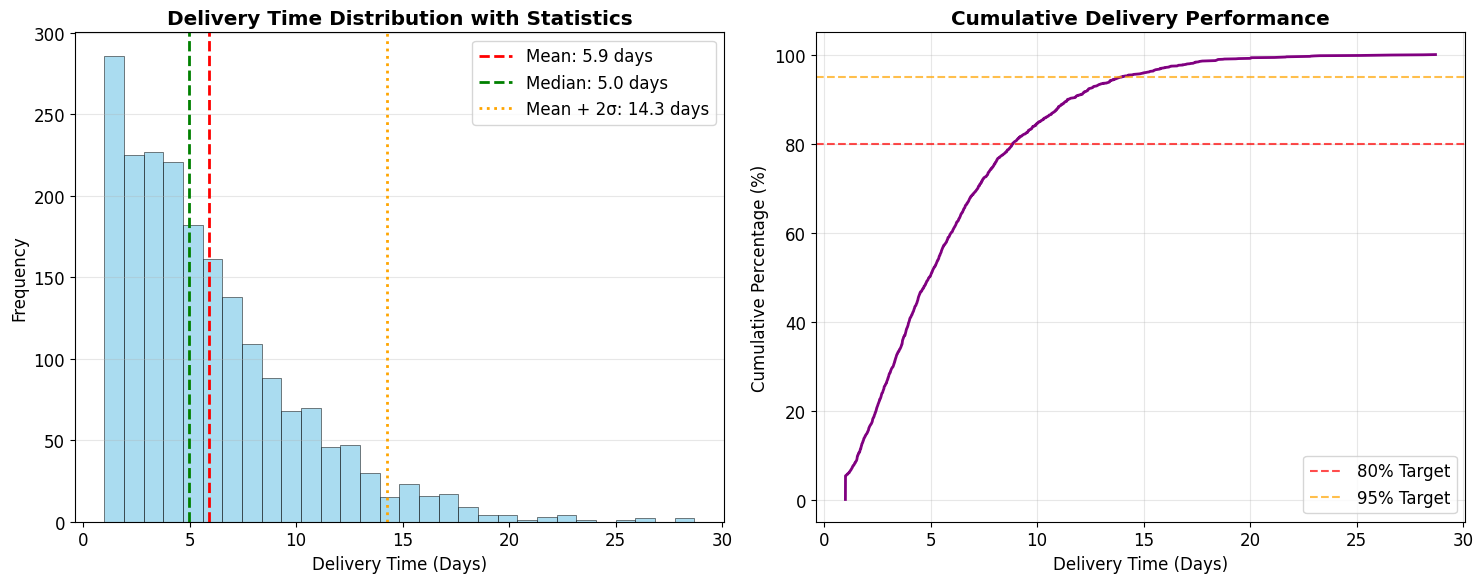

📊 Business Performance Metrics:
   • 80% of orders delivered within: 8.9 days
   • 95% of orders delivered within: 14.0 days
   • Distribution shape: Right-skewed (typical for delivery times)
   • Outliers (>15 days): 82 orders (4.1%)


In [16]:
# 4.2 Enhanced Histogram with Statistical Insights
print("📈 Creating Enhanced Histogram with Business Context")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Left plot: Histogram with statistical lines
n, bins, patches = ax1.hist(delivery_times, bins=30, alpha=0.7, color='skyblue', 
                           edgecolor='black', linewidth=0.5)

# Add statistical reference lines
mean_delivery = np.mean(delivery_times)
median_delivery = np.median(delivery_times)
std_delivery = np.std(delivery_times)

ax1.axvline(mean_delivery, color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_delivery:.1f} days')
ax1.axvline(median_delivery, color='green', linestyle='--', linewidth=2, 
           label=f'Median: {median_delivery:.1f} days')
ax1.axvline(mean_delivery + 2*std_delivery, color='orange', linestyle=':', linewidth=2, 
           label=f'Mean + 2σ: {mean_delivery + 2*std_delivery:.1f} days')

ax1.set_title('Delivery Time Distribution with Statistics', fontweight='bold')
ax1.set_xlabel('Delivery Time (Days)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Right plot: Cumulative distribution (business insight)
sorted_times = np.sort(delivery_times)
cumulative_pct = np.arange(1, len(sorted_times) + 1) / len(sorted_times) * 100

ax2.plot(sorted_times, cumulative_pct, linewidth=2, color='purple')
ax2.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='80% Target')
ax2.axhline(y=95, color='orange', linestyle='--', alpha=0.7, label='95% Target')

ax2.set_title('Cumulative Delivery Performance', fontweight='bold')
ax2.set_xlabel('Delivery Time (Days)')
ax2.set_ylabel('Cumulative Percentage (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Business insights
days_80_pct = np.percentile(delivery_times, 80)
days_95_pct = np.percentile(delivery_times, 95)

print("📊 Business Performance Metrics:")
print(f"   • 80% of orders delivered within: {days_80_pct:.1f} days")
print(f"   • 95% of orders delivered within: {days_95_pct:.1f} days")
print(f"   • Distribution shape: {'Right-skewed (typical for delivery times)' if mean_delivery > median_delivery else 'Left-skewed'}")
print(f"   • Outliers (>15 days): {np.sum(delivery_times > 15)} orders ({np.sum(delivery_times > 15)/len(delivery_times)*100:.1f}%)")

📊 Comparing Multiple Distributions


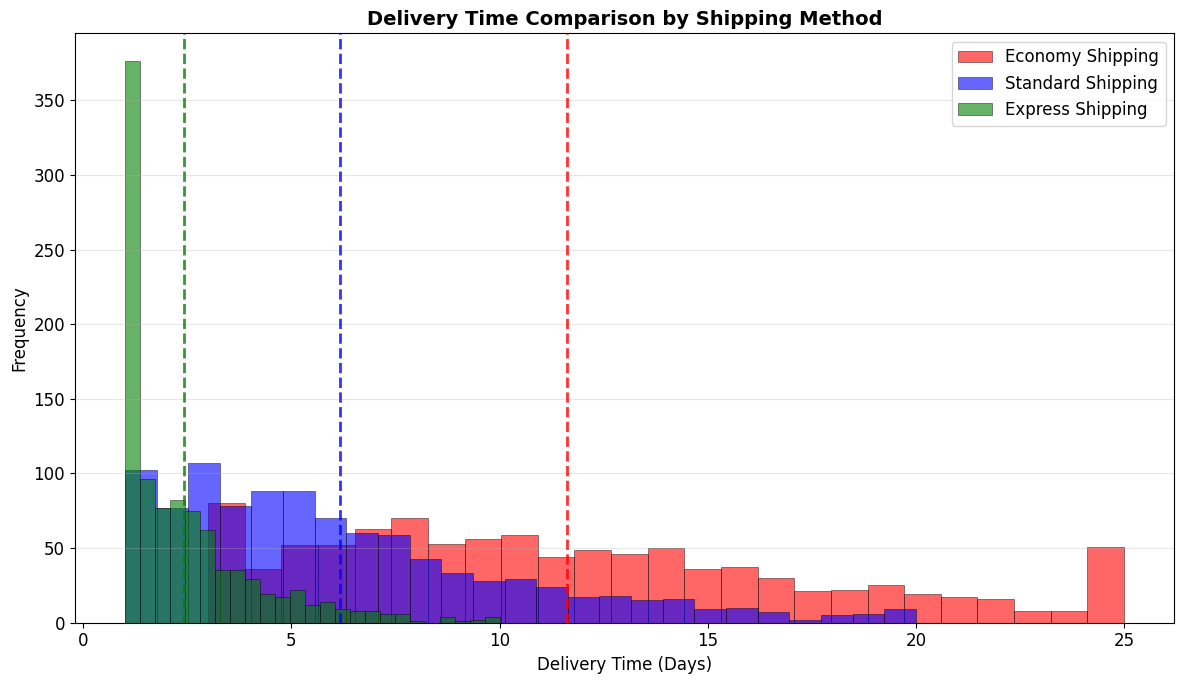

📈 Shipping Method Comparison:
   Express - Mean: 2.4 days, 95th percentile: 6.0 days
   Standard - Mean: 6.2 days, 95th percentile: 14.4 days
   Economy - Mean: 11.6 days, 95th percentile: 24.8 days

💡 Business insight: Clear separation between shipping tiers validates pricing strategy


In [17]:
# 4.3 Comparing Distributions - Multiple Histograms
print("📊 Comparing Multiple Distributions")

# Create different delivery time scenarios
np.random.seed(42)
standard_delivery = np.random.gamma(2, 3, 1000)
express_delivery = np.random.gamma(1.5, 1.5, 1000)
economy_delivery = np.random.gamma(3, 4, 1000)

# Clip to realistic ranges
standard_delivery = np.clip(standard_delivery, 1, 20)
express_delivery = np.clip(express_delivery, 1, 10)
economy_delivery = np.clip(economy_delivery, 3, 25)

fig, ax = plt.subplots(figsize=(12, 7))

# Overlay multiple histograms
ax.hist(economy_delivery, bins=25, alpha=0.6, label='Economy Shipping', 
        color='red', edgecolor='black', linewidth=0.5)
ax.hist(standard_delivery, bins=25, alpha=0.6, label='Standard Shipping', 
        color='blue', edgecolor='black', linewidth=0.5)
ax.hist(express_delivery, bins=25, alpha=0.6, label='Express Shipping', 
        color='green', edgecolor='black', linewidth=0.5)

# Add mean lines for each distribution
ax.axvline(np.mean(economy_delivery), color='red', linestyle='--', linewidth=2, alpha=0.8)
ax.axvline(np.mean(standard_delivery), color='blue', linestyle='--', linewidth=2, alpha=0.8)
ax.axvline(np.mean(express_delivery), color='green', linestyle='--', linewidth=2, alpha=0.8)

ax.set_title('Delivery Time Comparison by Shipping Method', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Delivery Time (Days)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Comparison statistics
print("📈 Shipping Method Comparison:")
print(f"   Express - Mean: {np.mean(express_delivery):.1f} days, 95th percentile: {np.percentile(express_delivery, 95):.1f} days")
print(f"   Standard - Mean: {np.mean(standard_delivery):.1f} days, 95th percentile: {np.percentile(standard_delivery, 95):.1f} days")
print(f"   Economy - Mean: {np.mean(economy_delivery):.1f} days, 95th percentile: {np.percentile(economy_delivery, 95):.1f} days")
print("\n💡 Business insight: Clear separation between shipping tiers validates pricing strategy")

## Choosing the Right Plot Type

### Decision Framework:

| Question | Recommended Plot |
|----------|------------------|
| How does this metric change over time? | **Line Plot** |
| Is there a relationship between X and Y? | **Scatter Plot** |
| Which category performs best? | **Bar Chart** |
| What's the shape of this data distribution? | **Histogram** |
| How do multiple groups compare? | **Grouped Bar Chart** |
| What are the outliers in my data? | **Scatter Plot** or **Histogram** |

### SQL to Visualization Mapping:

```sql
-- Time series aggregation → Line Plot
SELECT DATE(order_date), COUNT(*) 
FROM orders GROUP BY DATE(order_date)

-- Category comparison → Bar Chart  
SELECT category, SUM(sales) 
FROM products GROUP BY category

-- Distribution analysis → Histogram
SELECT order_value FROM orders

-- Correlation analysis → Scatter Plot
SELECT price, review_score FROM orders
```

🎯 Demonstration: Same Data, Different Plot Types, Different Insights


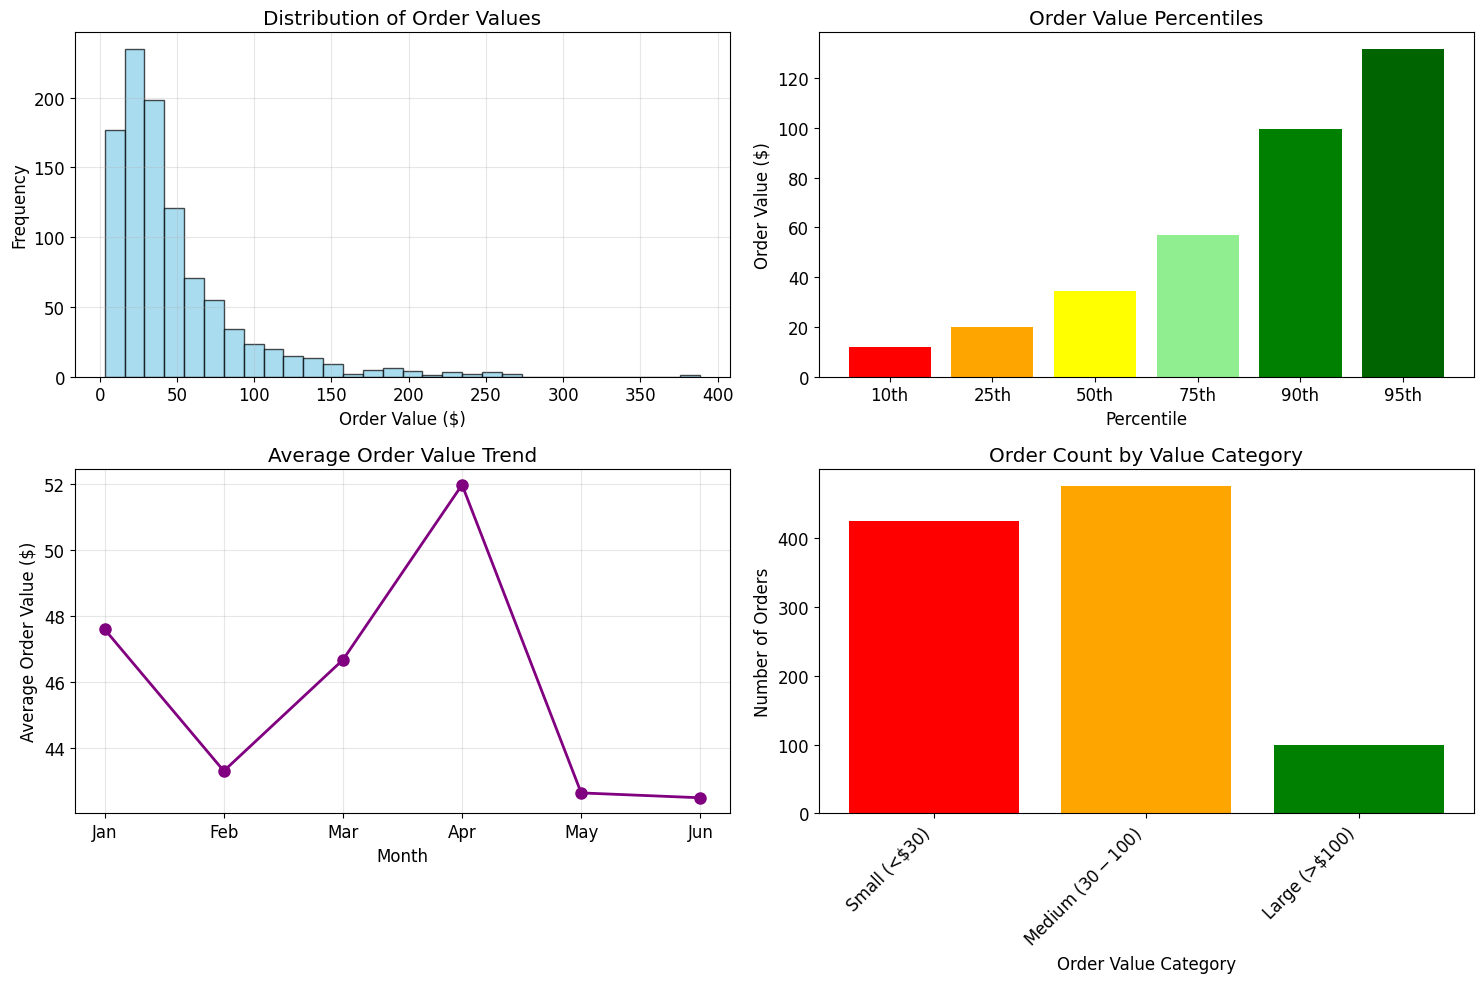

🔍 Each plot reveals different insights:
   📊 Histogram: Shows right-skewed distribution
   📈 Percentiles: Quantifies the distribution
   📉 Time series: Reveals trends over time
   🏷️ Categories: Shows customer segments

💡 Choose your plot based on the question you're trying to answer!


In [18]:
# Comprehensive Example: Same Data, Different Insights
print("🎯 Demonstration: Same Data, Different Plot Types, Different Insights")

# Using order value data for multiple visualization approaches
order_values = satisfaction_data['order_value']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogram - Distribution shape
ax1.hist(order_values, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Order Values')
ax1.set_xlabel('Order Value ($)')
ax1.set_ylabel('Frequency')
ax1.grid(True, alpha=0.3)

# 2. Box plot equivalent with percentiles (using bar chart)
percentiles = [10, 25, 50, 75, 90, 95]
values = [np.percentile(order_values, p) for p in percentiles]
ax2.bar(range(len(percentiles)), values, color=['red', 'orange', 'yellow', 'lightgreen', 'green', 'darkgreen'])
ax2.set_title('Order Value Percentiles')
ax2.set_xlabel('Percentile')
ax2.set_ylabel('Order Value ($)')
ax2.set_xticks(range(len(percentiles)))
ax2.set_xticklabels([f'{p}th' for p in percentiles])

# 3. Time series (simulated monthly aggregation)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
monthly_avg_order = [np.random.choice(order_values, 100).mean() for _ in months]
ax3.plot(months, monthly_avg_order, 'o-', linewidth=2, markersize=8, color='purple')
ax3.set_title('Average Order Value Trend')
ax3.set_xlabel('Month')
ax3.set_ylabel('Average Order Value ($)')
ax3.grid(True, alpha=0.3)

# 4. Categorical breakdown (simulated)
value_categories = ['Small (<$30)', 'Medium ($30-$100)', 'Large (>$100)']
category_counts = [
    np.sum(order_values < 30),
    np.sum((order_values >= 30) & (order_values < 100)),
    np.sum(order_values >= 100)
]
ax4.bar(value_categories, category_counts, color=['red', 'orange', 'green'])
ax4.set_title('Order Count by Value Category')
ax4.set_xlabel('Order Value Category')
ax4.set_ylabel('Number of Orders')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("🔍 Each plot reveals different insights:")
print("   📊 Histogram: Shows right-skewed distribution")
print("   📈 Percentiles: Quantifies the distribution")
print("   📉 Time series: Reveals trends over time")
print("   🏷️ Categories: Shows customer segments")
print("\n💡 Choose your plot based on the question you're trying to answer!")

## Practical Exercise: Quick Implementation

Now it's your turn! Try creating each plot type with the sample data.

In [ ]:
# Student Exercise: Create Your Own Plots
print("🎯 Your Turn: Practice Exercise")
print("Create the following plots using the data we've prepared:")
print("\n1. Line Plot: Monthly order trends")
print("2. Scatter Plot: Any two variables of your choice")
print("3. Bar Chart: Compare top 5 categories")
print("4. Histogram: Analyze any continuous variable")
print("\n📝 Add titles, labels, and at least one insight comment for each plot")
print("⏰ Time: 10 minutes")

# Starter code for students:
# Uncomment and complete the following:

# Exercise 1: Line Plot
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.plot(_____, _____)
# ax.set_title('_____')
# plt.show()

# Exercise 2: Scatter Plot
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(_____, _____)
# ax.set_title('_____')
# plt.show()

# Exercise 3: Bar Chart
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.bar(_____, _____)
# ax.set_title('_____')
# plt.show()

# Exercise 4: Histogram
# fig, ax = plt.subplots(figsize=(10, 6))
# ax.hist(_____, bins=_____)
# ax.set_title('_____')
# plt.show()

print("\n🚀 Challenge: Can you combine multiple plot types in one figure?")

## Key Takeaways

### 🎯 Four Fundamental Plot Types:
1. **Line Plots** → Trends and time series
2. **Scatter Plots** → Relationships and correlations  
3. **Bar Charts** → Category comparisons and rankings
4. **Histograms** → Data distributions and patterns

### 🎯 Business Applications:
- **Line plots**: Track KPIs over time, identify seasonal patterns
- **Scatter plots**: Explore customer behavior, validate assumptions
- **Bar charts**: Compare performance across segments, rank priorities
- **Histograms**: Understand customer distribution, quality control

### 🎯 Technical Best Practices:
- Always use the **object-oriented interface** for professional work
- **Choose plot types** based on your data and question
- **Add context** with titles, labels, and legends
- **Consider your audience** - business stakeholders need clear insights

### 🎯 SQL to Python Bridge:
- SQL `GROUP BY` → Bar charts and line plots
- SQL `SELECT column` → Histograms for distribution
- SQL `JOIN` results → Scatter plots for relationships
- SQL `ORDER BY` → Sorted bar charts and rankings

---

## Next Up: Customizing Visualizations

In the final section of today's session, we'll learn how to:
- Add professional styling and colors
- Create publication-ready visualizations
- Apply consistent branding
- Make your plots accessible and business-ready

**Practice Question**: Which plot type would you use to answer "How has customer satisfaction changed over the past year?" Why?